In [2]:
from standardInclude import *

Welcome to JupyROOT 6.12/06
For interactive plots, run: setint()
To return to non-interactive plots (default state), run: noint()


In [59]:
f = r.TFile("./data/SimuTreeMaker_partial.root")
f.cd("SimuTreeMaker")
f.ls()

TFile**		./data/SimuTreeMaker_partial.root	
 TFile*		./data/SimuTreeMaker_partial.root	
  TDirectoryFile*		SimuTreeMaker	SimuTreeMaker (SimuTreeMaker) folder
   KEY: TTree	gm2ringsimTree;8	gm2ringsimTree
   KEY: TTree	gm2ringsimTree;7	gm2ringsimTree
  KEY: TDirectoryFile	SimuTreeMaker;1	SimuTreeMaker (SimuTreeMaker) folder


In [60]:
t = f.Get("SimuTreeMaker").Get("gm2ringsimTree")
t.Print()

******************************************************************************
*Tree    :gm2ringsimTree: gm2ringsimTree                                         *
*Entries :  2000000 : Total =       469995290 bytes  File  Size =  217618517 *
*        :          : Tree compression factor =   2.16                       *
******************************************************************************
*Br    0 :runNum    : runNum/I                                               *
*Entries :  2000000 : Total  Size=    8004532 bytes  File Size  =      43862 *
*Baskets :       41 : Basket Size=    2399744 bytes  Compression= 182.47     *
*............................................................................*
*Br    1 :subRunNum : subRunNum/I                                            *
*Entries :  2000000 : Total  Size=    8004667 bytes  File Size  =      45464 *
*Baskets :       41 : Basket Size=    2399744 bytes  Compression= 176.04     *
*...............................................

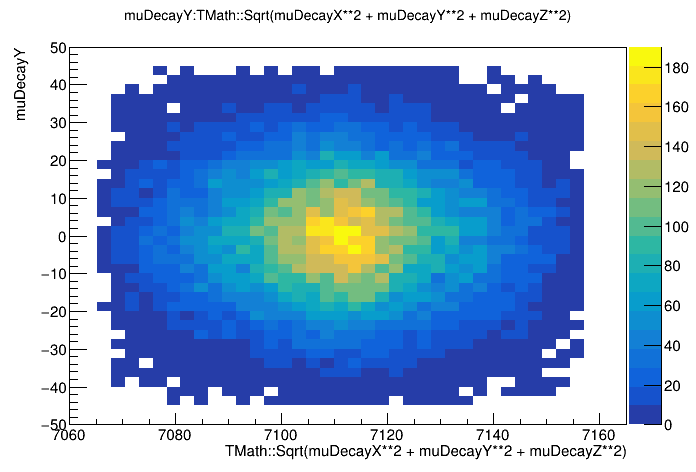

In [61]:
c = r.TCanvas()
#condition = "@eCaloNum.size() > 100"
condition = "eCaloNum == 1"
fout = r.TFile("temp_tree_storage.root","recreate")
fout.cd()
t_partial = t.CopyTree(condition)
t_partial.SetLineColor(2)
#t_partial.Print()
t_partial.Draw("muDecayY:TMath::Sqrt(muDecayX**2 + muDecayY**2 + muDecayZ**2)","","colz")
c.Draw()

In [62]:
print(t_partial.GetEntries())

38534


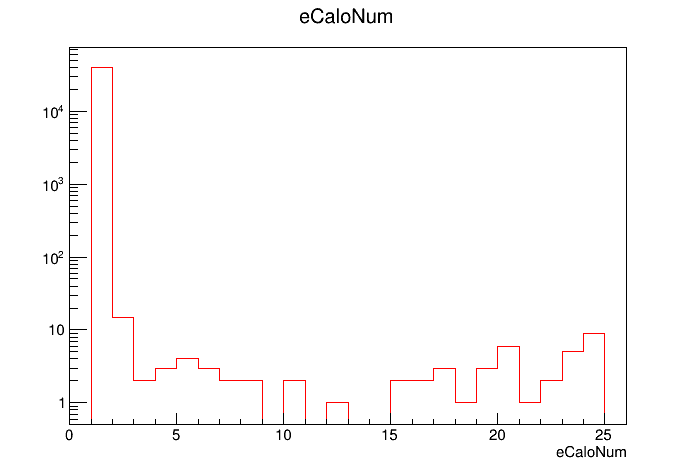

In [63]:
c = r.TCanvas()
t_partial.Draw("eCaloNum")
c.SetLogy()
c.Draw()

In [64]:
totalEVec = []
for i, e in enumerate(t_partial):
    if i > 10:
        break
    print("Number of Entries in Vecotrs:", len(e.eCaloE))
    print("     run / subrun / event:", e.runNum, "/", e.subRunNum, "/", e.eventNum)
    print("     eCaloE: ", [x for x in e.eCaloE])
    print("     eCaloNum: ", [x for x in e.eCaloNum])
    for x in e.eCaloE:
        totalEVec.append(x)
    #plt.hist([x for x in e.eCaloE],bins = 100)
    #plt.yscale('log')
    #plt.show()

Number of Entries in Vecotrs: 1
     run / subrun / event: 1544564276 / 1 / 94
     eCaloE:  [1295.744873046875]
     eCaloNum:  [1]
Number of Entries in Vecotrs: 1
     run / subrun / event: 1544564276 / 1 / 99
     eCaloE:  [1399.6962890625]
     eCaloNum:  [1]
Number of Entries in Vecotrs: 1
     run / subrun / event: 1544564276 / 1 / 116
     eCaloE:  [894.5422973632812]
     eCaloNum:  [1]
Number of Entries in Vecotrs: 1
     run / subrun / event: 1544564276 / 1 / 147
     eCaloE:  [749.6863403320312]
     eCaloNum:  [1]
Number of Entries in Vecotrs: 1
     run / subrun / event: 1544564276 / 1 / 149
     eCaloE:  [2767.08154296875]
     eCaloNum:  [1]
Number of Entries in Vecotrs: 1
     run / subrun / event: 1544564276 / 1 / 166
     eCaloE:  [770.5742797851562]
     eCaloNum:  [1]
Number of Entries in Vecotrs: 1
     run / subrun / event: 1544564276 / 1 / 170
     eCaloE:  [1525.3961181640625]
     eCaloNum:  [1]
Number of Entries in Vecotrs: 1
     run / subrun / event: 1544564

/home/jlab/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3507: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0
  self.set_ylim(upper, lower, auto=None)


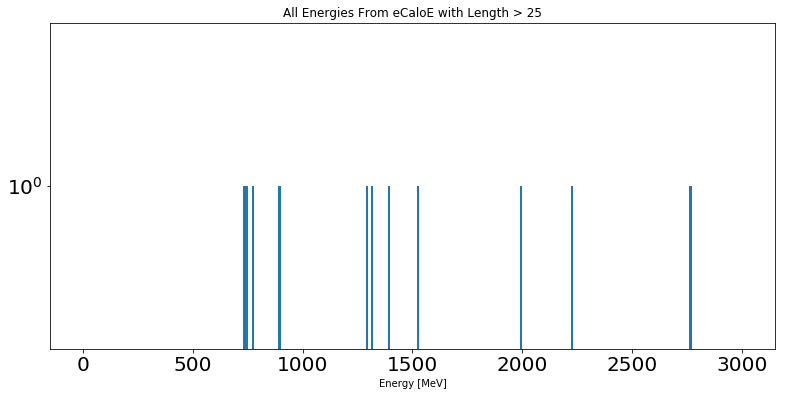

In [65]:
noint()
fig,ax = plt.subplots(figsize=(13,6))
plt.hist(totalEVec,bins=300,range=(0,3000))
plt.title("All Energies From eCaloE with Length > 25")
plt.xlabel("Energy [MeV]")
plt.yscale("log")
#plt.grid()
plt.show()

eCaloNum == 2  || eCaloNum == 3  || eCaloNum == 4  || eCaloNum == 5  || eCaloNum == 6  || eCaloNum == 7  || eCaloNum == 8  || eCaloNum == 9  || eCaloNum == 10  || eCaloNum == 11  || eCaloNum == 12  || eCaloNum == 13  || eCaloNum == 14  || eCaloNum == 15  || eCaloNum == 16  || eCaloNum == 17  || eCaloNum == 18  || eCaloNum == 19  || eCaloNum == 20  || eCaloNum == 21  || eCaloNum == 22  || eCaloNum == 23  || eCaloNum == 24 


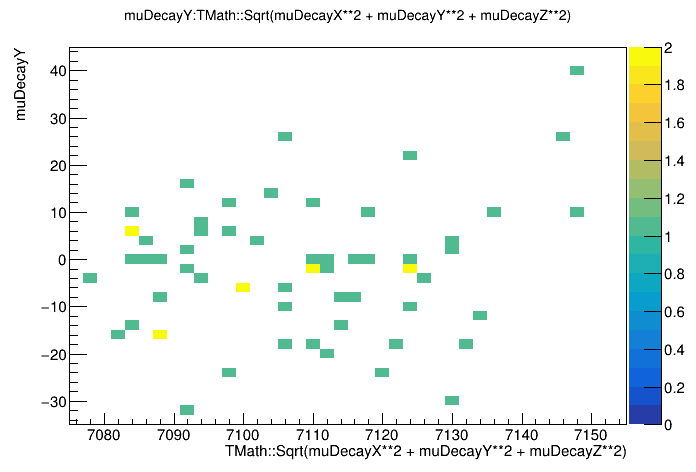

In [66]:
c = r.TCanvas()
#condition = "@eCaloNum.size() > 100"
condition = "eCaloNum == 2 "
for i in range(3,25):
    condition += " || eCaloNum == "+str(i)+" "
print(condition)
fout2 = r.TFile("temp_tree_storage_2.root","recreate")
fout2.cd()
t_partial2 = t_partial.CopyTree(condition)
t_partial2.SetLineColor(3)
#t_partial.Print()
t_partial2.Draw("muDecayY:TMath::Sqrt(muDecayX**2 + muDecayY**2 + muDecayZ**2)","","colz")
c.Draw()

In [67]:
print(t_partial2.GetEntries())

62


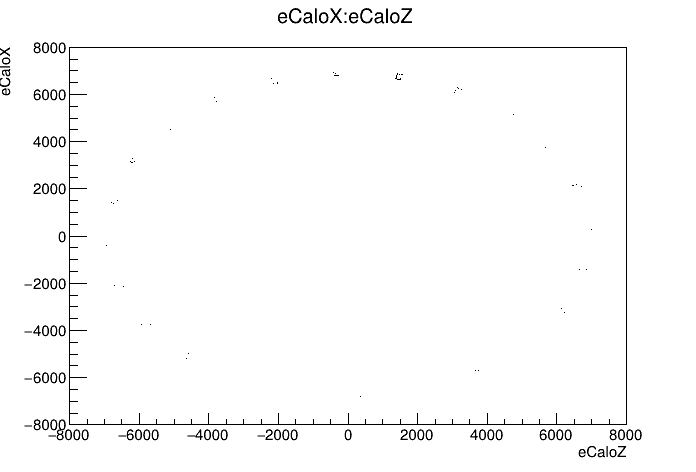

In [68]:
c = r.TCanvas()
t_partial2.Draw("eCaloX:eCaloZ")
c.Draw()

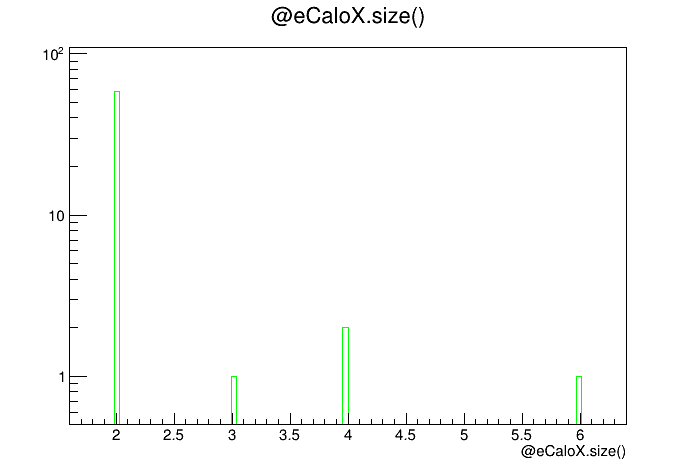

In [69]:
c = r.TCanvas()
t_partial2.Draw("@eCaloX.size()")
c.SetLogy()
c.Draw()

In [73]:
totalEVec = []
deltatVec = []
subRunVec = []
for i, e in enumerate(t_partial2):
    #if i > 10:
    #    break
    if(len(e.eCaloE) < 2 ):
        continue
    #if(e.subRunNum != 1049):
    #    continue
    print("Number of Entries in Vectors:", len(e.eCaloE))
    print("     run / subrun / event:", e.runNum, "/", e.subRunNum, "/", e.eventNum)
    subRunVec.append(e.subRunNum)
    print("     eCaloE: ", [x for x in e.eCaloE])
    print("     eCaloNum: ", [x for x in e.eCaloNum])
    print("     eCaloT: ", [x for x in e.eCaloT])
    print("     eCaloT: ", [(e.eCaloT)[i] - (e.eCaloT)[i+1] for i in range(len(e.eCaloT)-1)])
    for x in e.eCaloE:
        totalEVec.append(x)
    for j in range(len(e.eCaloT)-1):
        if((e.eCaloNum[0] != e.eCaloNum[1] )):
            deltatVec.append((e.eCaloT)[j] - (e.eCaloT)[j+1] )
    #plt.hist([x for x in e.eCaloE],bins = 100)
    #plt.yscale('log')
    #plt.show()

Number of Entries in Vectors: 2
     run / subrun / event: 1544564276 / 1006 / 339
     eCaloE:  [199.59207153320312, 6.509474754333496]
     eCaloNum:  [10, 1]
     eCaloT:  [20381.037109375, 20433.29296875]
     eCaloT:  [-52.255859375]
Number of Entries in Vectors: 2
     run / subrun / event: 1544564276 / 1007 / 3963
     eCaloE:  [1851.599365234375, 1181.1015625]
     eCaloNum:  [1, 5]
     eCaloT:  [41184.8515625, 41207.6640625]
     eCaloT:  [-22.8125]
Number of Entries in Vectors: 2
     run / subrun / event: 1544564276 / 1028 / 3469
     eCaloE:  [847.0526733398438, 62.3848991394043]
     eCaloNum:  [2, 1]
     eCaloT:  [50880.55859375, 50888.61328125]
     eCaloT:  [-8.0546875]
Number of Entries in Vectors: 2
     run / subrun / event: 1544564276 / 1041 / 1969
     eCaloE:  [41.17017364501953, 32.98209762573242]
     eCaloNum:  [1, 21]
     eCaloT:  [5375.810546875, 5402.76171875]
     eCaloT:  [-26.951171875]
Number of Entries in Vectors: 2
     run / subrun / event: 1544564

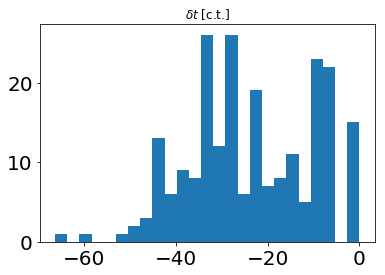

Mean -23.552560261317662


In [58]:
plt.hist(deltatVec,bins=25)
plt.title(r'$\delta t$ [c.t.]')
plt.show()
print("Mean", np.mean(deltatVec))

[1006, 1007, 1028, 1041, 1042, 1043, 1047, 1047, 1049, 1061, 1063, 1101, 1105, 1114, 1135, 1136, 1138, 1153, 1154, 1155, 1167, 1188, 1189, 1194, 1197, 1219, 1222, 123, 1233, 1236, 1239, 1242, 1261, 1262, 1266, 1271, 1280, 1285, 1292, 1297, 13, 1302, 1306, 1322, 1325, 1335, 1340, 1355, 136, 1371, 1381, 1392, 1393, 1399, 1406, 1407, 1409, 1418, 1419, 1421, 1441, 1442]


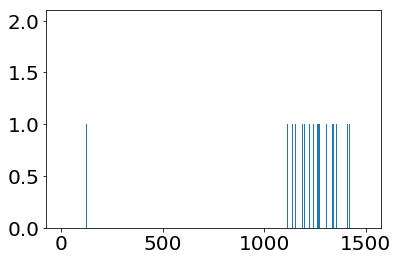

In [77]:
print(subRunVec)
plt.hist(subRunVec,bins=1500,range=(0,1500))
plt.show()